# CLV Project - Python EDA

## Importing liabraries and Data


In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("EdTech_Student_Lifetime_Value_Dataset.csv")
df

,Enrollment_ID,Student_ID,Enrollment_Date,Course_Category,Amount_Paid,Payment_Mode,Completion_Rate_%,Total_Learning_Minutes,Certification_Earned,Is_Returning_Student
0,1,221958,8/28/2022,Design,"?7,958",EMI,69.82,1108,0,0
1,2,771155,5/16/2022,Programming,"?17,735",Credit Card,73.08,1723,0,0
2,3,231932,7/16/2022,Data Analytics,"?19,255",Debit Card,50.80,1827,0,0
3,4,465838,10/12/2021,Programming,"?15,833",UPI,82.89,1743,1,1
4,5,359178,8/11/2021,Programming,"?19,094",Net Banking,53.88,700,0,0
...,...,...,...,...,...,...,...,...,...,...
19995,19996,368617,9/3/2021,Data Analytics,"?11,877",Debit Card,77.06,1986,1,1
19996,19997,796658,5/20/2021,Design,"?12,614",Debit Card,82.93,1837,1,0
19997,19998,511885,3/19/2023,Finance,"?14,307",EMI,73.36,1912,0,0
19998,19999,985932,9/15/2021,Marketing,"?8,882",Credit Card,63.53,1103,0,1


## View basic structure

In [30]:
df.head()

,enrollment_id,student_id,enrollment_date,course_category,amount_paid,payment_mode,completion_rate_%,total_learning_minutes,certification_earned,is_returning_student
0,1,221958,2022-08-28,Design,7958,EMI,69.82,1108,0,0
1,2,771155,2022-05-16,Programming,17735,Credit Card,73.08,1723,0,0
2,3,231932,2022-07-16,Data Analytics,19255,Debit Card,50.80,1827,0,0
3,4,465838,2021-10-12,Programming,15833,UPI,82.89,1743,1,1
4,5,359178,2021-08-11,Programming,19094,Net Banking,53.88,700,0,0


In [5]:
df.tail()

,Enrollment_ID,Student_ID,Enrollment_Date,Course_Category,Amount_Paid,Payment_Mode,Completion_Rate_%,Total_Learning_Minutes,Certification_Earned,Is_Returning_Student
19995,19996,368617,9/3/2021,Data Analytics,"?11,877",Debit Card,77.06,1986,1,1
19996,19997,796658,5/20/2021,Design,"?12,614",Debit Card,82.93,1837,1,0
19997,19998,511885,3/19/2023,Finance,"?14,307",EMI,73.36,1912,0,0
19998,19999,985932,9/15/2021,Marketing,"?8,882",Credit Card,63.53,1103,0,1
19999,20000,925217,9/9/2022,Design,"?5,359",Credit Card,54.44,1582,0,0


In [6]:
df.shape

(20000, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Enrollment_ID           20000 non-null  int64  
 1   Student_ID              20000 non-null  int64  
 2   Enrollment_Date         20000 non-null  object 
 3   Course_Category         20000 non-null  object 
 4    Amount_Paid            20000 non-null  object 
 5   Payment_Mode            20000 non-null  object 
 6   Completion_Rate_%       20000 non-null  float64
 7   Total_Learning_Minutes  20000 non-null  int64  
 8   Certification_Earned    20000 non-null  int64  
 9   Is_Returning_Student    20000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 1.5+ MB


In [8]:
df.columns

Index(['Enrollment_ID', 'Student_ID', 'Enrollment_Date', 'Course_Category',
       ' Amount_Paid ', 'Payment_Mode', 'Completion_Rate_%',
       'Total_Learning_Minutes', 'Certification_Earned',
       'Is_Returning_Student'],
      dtype='object')

In [9]:
df.isnull().sum()

Enrollment_ID             0
Student_ID                0
Enrollment_Date           0
Course_Category           0
 Amount_Paid              0
Payment_Mode              0
Completion_Rate_%         0
Total_Learning_Minutes    0
Certification_Earned      0
Is_Returning_Student      0
dtype: int64

## Finding Duplicates

In [31]:

df.duplicated().sum()


0

In [25]:
df.columns = df.columns.str.strip().str.replace(' ', '_')


In [26]:
df.columns


Index(['Enrollment_ID', 'Student_ID', 'Enrollment_Date', 'Course_Category',
       'Amount_Paid', 'Payment_Mode', 'Completion_Rate_%',
       'Total_Learning_Minutes', 'Certification_Earned',
       'Is_Returning_Student'],
      dtype='object')

In [27]:

df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)


## Changing Datatype of columns 

In [28]:
df['amount_paid'] = (
    df['amount_paid']
    .astype(str)
    .str.strip()
    .str.replace(r'[₹?,]', '', regex=True)   # removes ₹ ? ,
)

df['amount_paid'] = pd.to_numeric(df['amount_paid'], errors='coerce')


In [29]:
df['amount_paid'].head()
df['amount_paid'].dtype


dtype('int64')

## Overall KPIs

In [33]:
total_students = df['student_id'].nunique()
total_revenue = df['amount_paid'].sum()
avg_revenue_per_student = total_revenue / total_students

print("Total Students:", total_students)
print("Total Revenue:", total_revenue)
print("Average Revenue per Student:", round(avg_revenue_per_student, 2))


Total Students: 19798
Total Revenue: 299884830
Average Revenue per Student: 15147.23


## Amount Paid Distribution


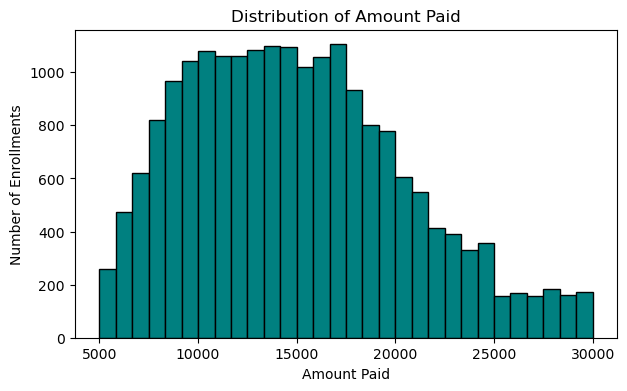

In [35]:
plt.figure(figsize=(7,4))
plt.hist(df["amount_paid"],bins=30,color="teal",edgecolor="black")
plt.title("Distribution of Amount Paid")
plt.xlabel("Amount Paid")
plt.ylabel("Number of Enrollments")
plt.show()

## Learning Minutes vs Amount Paid

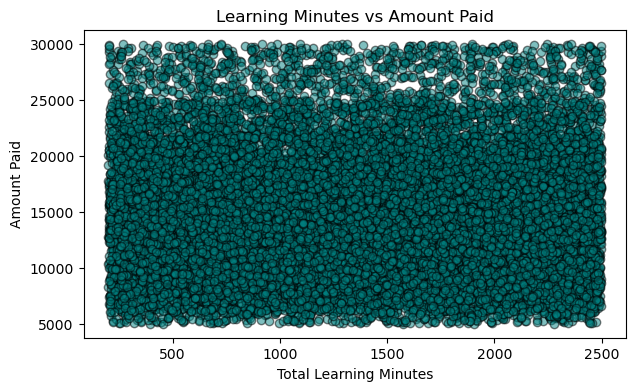

In [37]:
plt.figure(figsize=(7,4))
plt.scatter(df['total_learning_minutes'], df['amount_paid'], alpha=0.5,color="teal",edgecolor="black")
plt.title('Learning Minutes vs Amount Paid')
plt.xlabel('Total Learning Minutes')
plt.ylabel('Amount Paid')
plt.show()


## Completion Rate Distribution

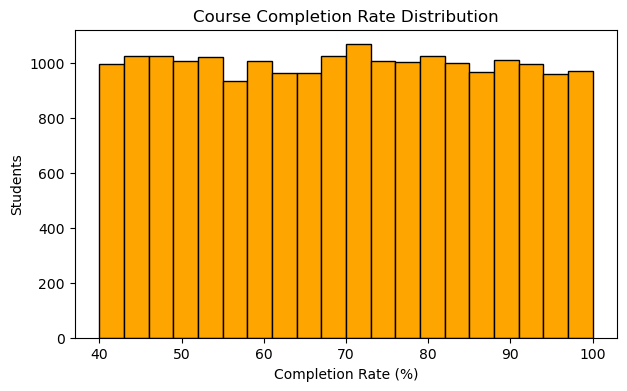

In [51]:
plt.figure(figsize=(7,4))
plt.hist(df['completion_rate_%'], bins=20,color="orange",edgecolor="black")
plt.title('Course Completion Rate Distribution')
plt.xlabel('Completion Rate (%)')
plt.ylabel('Students')
plt.show()


## Revenue Comparison

In [52]:
df.groupby('is_returning_student')['amount_paid'].mean()


is_returning_student
0    14986.910596
1    15005.139873
Name: amount_paid, dtype: float64

## Bar Chart

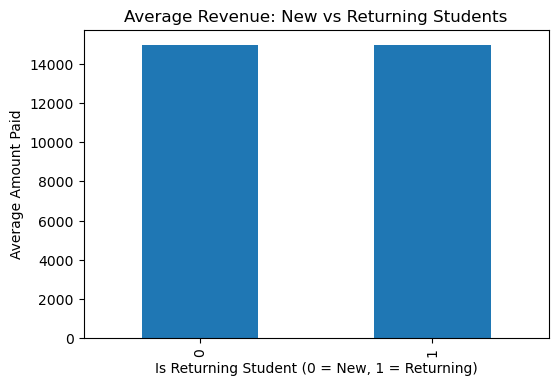

In [55]:
plt.figure(figsize=(6,4))
df.groupby('is_returning_student')['amount_paid'].mean().plot(kind='bar')
plt.title('Average Revenue: New vs Returning Students')
plt.xlabel('Is Returning Student (0 = New, 1 = Returning)')
plt.ylabel('Average Amount Paid')
plt.show()
